# Data Description:
 
### Image types: 
* Native T1-weighted (T1): This scan is obtained using a standard T1-weighted imaging sequence, which uses a short TR (repetition time) and a short TE (echo time) to provide high-resolution images of the brain tissue. This sequence highlights the differences in tissue types based on their contrast with the surrounding tissues.

* Post-contrast T1-weighted (T1Gd): This scan is obtained using a T1-weighted imaging sequence after the administration of a contrast agent such as Gadolinium. The contrast agent is injected intravenously and is taken up by cells with a disrupted blood-brain barrier, which is a common characteristic of brain tumors. This sequence highlights the regions of the brain with a disrupted blood-brain barrier, such as enhancing tumor regions.

* T2-weighted (T2): This scan is obtained using a T2-weighted imaging sequence, which uses a long TR and a long TE to provide a more detailed view of the brain tissue. This sequence highlights subtle differences in tissue types that are not visible on T1 scans.

* T2 Fluid Attenuated Inversion Recovery (T2-FLAIR): This scan is obtained using a T2-weighted imaging sequence that is modified to suppress the signal from cerebrospinal fluid (CSF). This is achieved by using an inversion recovery pulse before the T2-weighted acquisition. This sequence is useful for distinguishing between edema and other types of brain tissue because the CSF signal is suppressed.

### Segmentation Classes:
* label 0: No tumor
* label 1: necrotic tumor core (Visible in T2): This class represents the core of the tumor, which is composed of necrotic tissue and non-enhancing tumor cells.
* label 2: the peritumoral edematous/invaded tissue (Visible in flair):  This class represents the edema, or swelling, that occurs around the tumor due to the accumulation of fluid in the surrounding brain tissue.
* label 4: Gd-enhancing tumor (Needs to be converted to 3) (Visible in T1ce): This class represents the region of the tumor that enhances with the administration of contrast agent.

# Basic Visualization

In [28]:
!pip install itkwidgets

  Using cached itkwidgets-0.32.6-py2.py3-none-any.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.8 MB/s eta 0:00:0000:01
  Using cached notebook-6.4.12-py3-none-any.whl (9.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 MB 2.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 MB 2.8 MB/s eta 0:00:0000:0100:01m
  Using cached traitlets-5.6.0-py3-none-any.whl (107 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.8.1
    Uninstalling traitlets-5.8.1:
      Successfully uninstalled traitlets-5.8.1
  Attempting uninstall: notebook
    Found existing installation: notebook 6.5.2
    Uninstalling notebook-6.5.2:
      Successfully uninstalled notebook-6.5.2
  Attempting uninstall: ipydatawidgets
    Found existing inst

In [29]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import glob
import os
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

In [30]:
class VisualizePatientData:
    def __init__(self, patient_data_folder, img_type_id):
        self.patient_data_list = sorted(glob.glob(os.path.join(patient_data_folder, "*")))
        self.image_types = ["flair", "seg", "t1", "t1ce", "t2"]
        self.cmap_list = ["gray", "BuPu", "gray", "gray", "gray"]
        self.i = img_type_id
        self.fig = plt.figure(figsize=(1, 1));
    
    def visualize_brain_scans(self, cube_path):
        def create_display(layer):
            self.fig.add_subplot(3, 2, self.i + 1)
            plt.imshow(self.scans[:, :, layer], cmap=self.cmap_list[self.i]);
            plt.axis('off')
            return layer
        self.scans = np.asarray(nib.load(cube_path).get_fdata())
        interact(create_display, layer=(0, self.scans.shape[2] - 1));

    def __call__(self, idx):        
        data_path = os.path.join(self.patient_data_list[idx], "BraTS20_Training_%03d_%s.nii" % (idx + 1, self.image_types[self.i]))
        self.visualize_brain_scans(data_path)

In [31]:
patient_data_folder = "/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS2020_TrainingData"
example_patient_id = 0

In [32]:
visualizer_flair = VisualizePatientData(patient_data_folder, 0)
visualizer_flair(example_patient_id)

<Figure size 100x100 with 0 Axes>

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [33]:
visualizer_seg = VisualizePatientData(patient_data_folder, 1)
visualizer_seg(example_patient_id)

<Figure size 100x100 with 0 Axes>

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [34]:
visualizer_seg = VisualizePatientData(patient_data_folder, 2)
visualizer_seg(example_patient_id)

<Figure size 100x100 with 0 Axes>

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [35]:
visualizer_seg = VisualizePatientData(patient_data_folder, 3)
visualizer_seg(example_patient_id)

<Figure size 100x100 with 0 Axes>

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [ ]:
visualizer_seg = VisualizePatientData(patient_data_folder, 4)
visualizer_seg(example_patient_id)

# Segmentation Classes study

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage.measurements import label, center_of_mass

In [3]:
patient_data_folder = "/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS2020_TrainingData"
patient_data_list = sorted(glob.glob(os.path.join(patient_data_folder, "*")))

In [4]:
core_tumor = []
peritumoral_tissue = []
enhancing_tumor = []
cube_size = 240 * 240 * 155
for i in tqdm(range(len(patient_data_list) - 2)):
    if i == 354:
        patient_label_data_path = "/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/W39_1998.09.19_Segm.nii"
    else:
        patient_label_data_path = os.path.join(patient_data_list[i], "BraTS20_Training_%03d_seg.nii" % (i + 1))
    patient_label_data = nib.load(patient_label_data_path).get_fdata()
    core_tumor.append((len(np.where(patient_label_data == 1)[0]) / cube_size) * 100)
    peritumoral_tissue.append((len(np.where(patient_label_data == 2)[0]) / cube_size) * 100)
    enhancing_tumor.append((len(np.where(patient_label_data == 4)[0]) / cube_size) * 100)

100%|██████████| 369/369 [01:28<00:00,  4.18it/s]


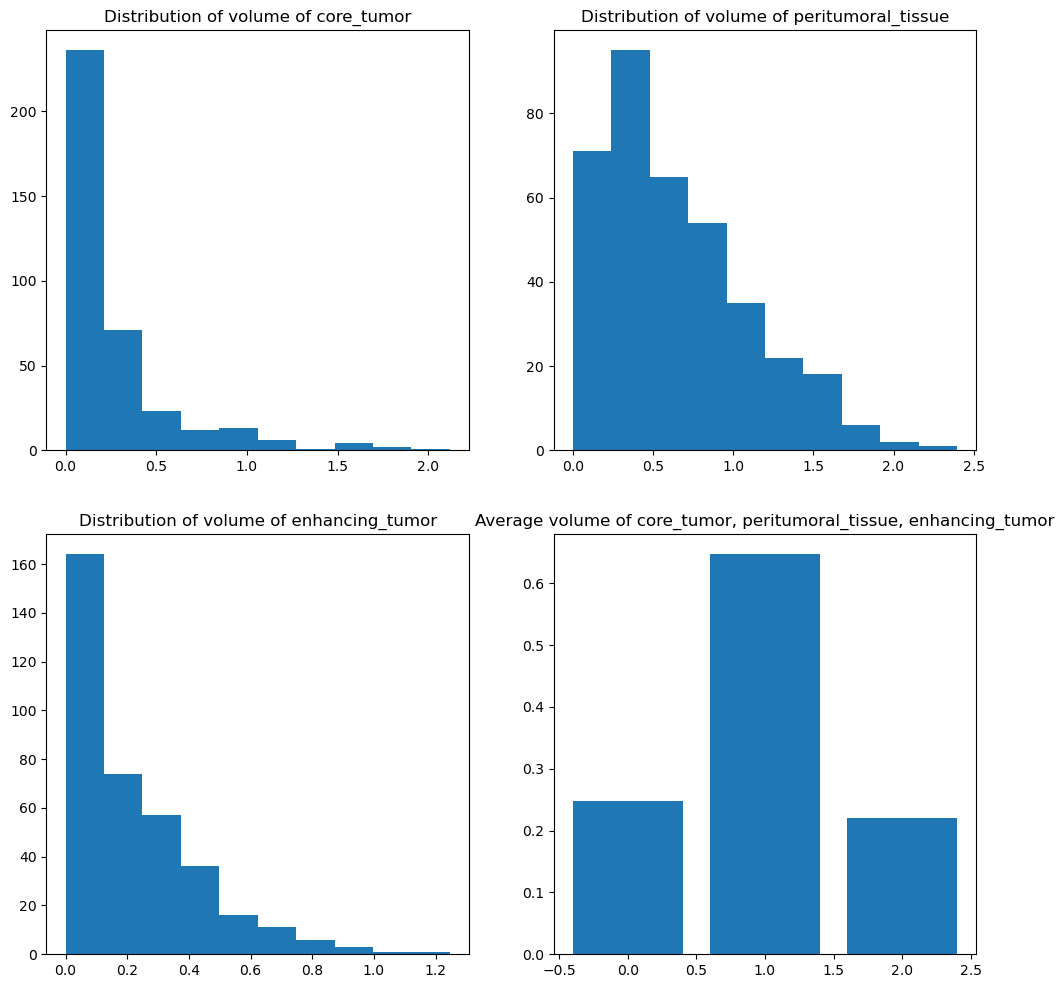

In [5]:
data = [core_tumor, peritumoral_tissue, enhancing_tumor]
data_string = ["core_tumor", "peritumoral_tissue", "enhancing_tumor"] 
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    if i == 3:
        plt.bar(x=[0, 1, 2], height=[np.average(core_tumor), np.average(peritumoral_tissue), np.average(enhancing_tumor)])
        plt.title("Average volume of %s, %s, %s" % (data_string[0], data_string[1], data_string[2]))
    else:    
        plt.hist(data[i])
        plt.title("Distribution of volume of %s" % data_string[i])

In [6]:
def visualize_brain_scans(scans):
    def create_display(layer):
        plt.imshow(scans[:, :, layer], cmap="BuPu");
        plt.axis('off')
        return layer
    interact(create_display, layer=(0, scans.shape[2] - 1));

In [13]:
def compute_centroid_volume_largest_component(seg_labels, label_id):
    seg_labels_core = np.asarray(seg_labels == label_id, dtype=np.uint8)
    labels, num_labels = label(seg_labels_core)
    volumes = []
    for i in range(1, num_labels + 1):
        volume = np.sum(labels == i)
        volumes.append(volume)
    volumes = np.array(volumes)
    if len(volumes):
        largest_components_id = np.argmax(volumes, -1) + 1
        centroid_i = center_of_mass(seg_labels_core, labels=labels, index=largest_components_id)
        volume_i = volumes[largest_components_id - 1]
        return centroid_i, volume_i
    else:
        return None, None

In [14]:
def centroid_volume_correlation(label_id):
    centroids = []
    volumes = []
    for i in tqdm(range(len(patient_data_list) - 2)):
        if i == 354:
            patient_label_data_path = "/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/W39_1998.09.19_Segm.nii"
        else:
            patient_label_data_path = os.path.join(patient_data_list[i], "BraTS20_Training_%03d_seg.nii" % (i + 1))
        patient_label_data = nib.load(patient_label_data_path).get_fdata()
        centroid_i, volume_i = compute_centroid_volume_largest_component(patient_label_data, label_id)
        if volume_i is None:
            continue
        centroids.append(centroid_i)
        volumes.append(volume_i)
    return centroids, volumes

In [15]:
label_id = 1
centroids, volumes = centroid_volume_correlation(label_id)
centroids = np.array(centroids)
volumes = np.array(volumes)

100%|██████████| 369/369 [11:20<00:00,  1.85s/it]


In [28]:
fig = plt.figure(figsize=(150, 150))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], s=volumes, c=volumes, cmap='BuPu')
ax.set_xlabel('X Centroid', fontsize=100)
ax.set_ylabel('Y Centroid', fontsize=100)
ax.set_zlabel('Z Centroid', fontsize=100)
ax.set_title('Correlation between Centroid and Volume', fontsize=100)
# cbar = plt.colorbar()
# cbar.set_label('Volume')
plt.show()